In [1]:
# pretty much copied will's code bc idk
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import sklearn

In [2]:
fx_tickers = """
EURUSD=X
JPY=X
GBPUSD=X
AUDUSD=X
NZDUSD=X
CNY=X
HKD=X
SGD=X
INR=X
MXN=X
PHP=X
IDR=X
THB=X
MYR=X
ZAR=X
RUB=X
""".strip().splitlines()
fx = yf.download(fx_tickers)['Adj Close']
fx = fx.dropna()

[*********************100%***********************]  16 of 16 completed


In [3]:
ratio = 2
for index,col in fx.items():
    for i in range(1, len(col) - 1):
        b = col[i]
        a = col[i-1] / b
        c = col[i+1] / b
        if a*ratio<1 and c*ratio<1 or a>ratio and c>ratio:
            col[i] = (col[i-1] + col[i+1]) / 2

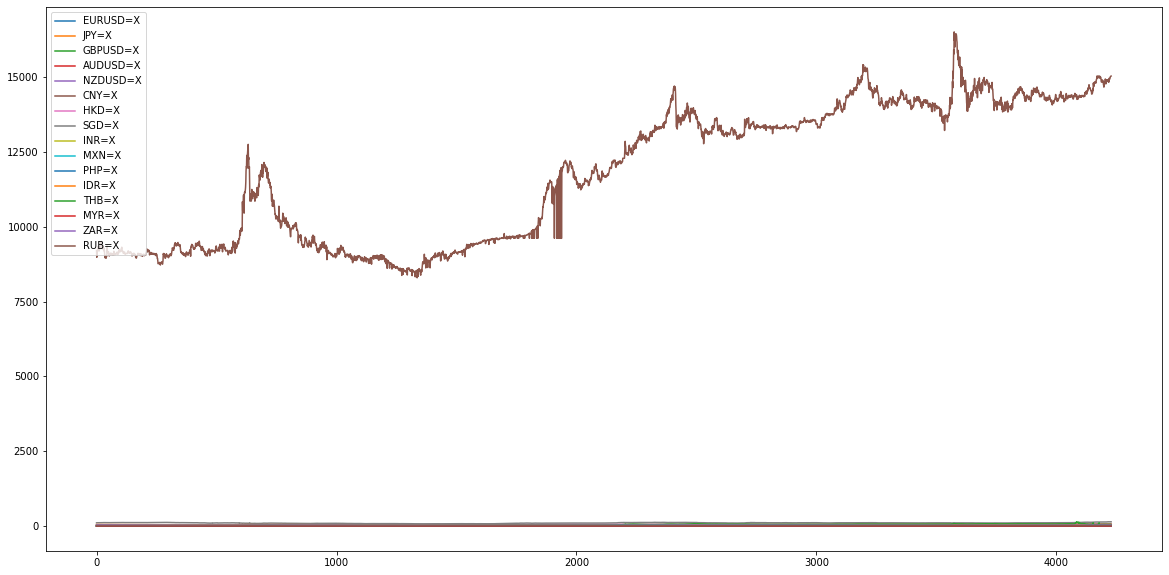

In [4]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(fx.to_numpy(), label=fx_tickers)
plt.legend(loc="upper left")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(fx, test_size=0.15, shuffle=False)

# normalize train and test data based off of std deviation and mean of the train set
normalized_X_train = (X_train - X_train.mean()) / X_train.std()
normalized_X_test = (X_test - X_train.mean()) / X_train.std()

normalized_X_train

,AUDUSD=X,CNY=X,EURUSD=X,GBPUSD=X,HKD=X,IDR=X,INR=X,JPY=X,MXN=X,MYR=X,NZDUSD=X,PHP=X,RUB=X,SGD=X,THB=X,ZAR=X
Date,,,,,,,,,,,,,,,,
2006-05-16,-0.608549,2.718070,0.133314,1.492293,-0.841836,-0.982184,-1.091643,0.516841,-1.145285,-0.014712,-1.343983,1.443364,-0.946636,2.248193,2.634012,-1.360943
2006-05-17,-0.671650,2.713844,0.049919,1.470170,-0.816025,-1.080309,-1.127045,0.602509,-1.094442,-0.066062,-1.384228,1.443364,-0.949267,2.312716,2.773143,-1.326272
2006-05-18,-0.634038,2.733705,0.134078,1.518896,-0.796674,-1.011991,-1.052891,0.601764,-1.100721,-0.026494,-1.395137,1.443364,-0.946277,2.293358,2.679563,-1.321529
2006-05-19,-0.690052,2.753991,0.069252,1.458992,-1.157972,-0.981903,-1.062938,0.658380,-1.104550,0.030192,-1.399285,1.633910,-0.943108,2.347127,2.725116,-1.310507
2006-05-22,-0.720947,2.766668,0.135608,1.481858,-0.799889,-0.956869,-1.063417,0.643481,-1.072083,0.062869,-1.384228,1.642195,-0.942690,2.361107,2.808791,-1.295610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-14,-1.650665,0.728872,-1.353786,-1.372851,-0.851512,2.088580,1.962060,0.357646,2.707821,1.615606,-1.555016,1.105075,1.840199,0.535654,0.035107,2.569358
2020-04-15,-1.623427,0.721898,-1.305634,-1.326688,-0.883768,2.007790,1.868386,0.318983,2.639459,1.624276,-1.557022,1.055100,1.805071,0.519094,0.000448,2.633990
2020-04-16,-1.726327,0.760356,-1.367593,-1.374196,-0.893444,2.152453,1.991003,0.356603,2.908131,1.647617,-1.698005,1.154230,1.912882,0.644806,0.029662,2.756206


            AUDUSD=X     CNY=X  EURUSD=X  GBPUSD=X     HKD=X     IDR=X  \
Date                                                                     
2006-05-16 -0.608549  2.718070  0.133314  1.492293 -0.841836 -0.982184   
2006-05-17 -0.671650  2.713844  0.049919  1.470170 -0.816025 -1.080309   
2006-05-18 -0.634038  2.733705  0.134078  1.518896 -0.796674 -1.011991   
2006-05-19 -0.690052  2.753991  0.069252  1.458992 -1.157972 -0.981903   
2006-05-22 -0.720947  2.766668  0.135608  1.481858 -0.799889 -0.956869   
...              ...       ...       ...       ...       ...       ...   
2020-04-14 -1.650665  0.728872 -1.353786 -1.372851 -0.851512  2.088580   
2020-04-15 -1.623427  0.721898 -1.305634 -1.326688 -0.883768  2.007790   
2020-04-16 -1.726327  0.760356 -1.367593 -1.374196 -0.893444  2.152453   
2020-04-17 -1.685544  0.786346 -1.403578 -1.389152 -0.902796  2.003107   
2020-04-20 -1.700653  0.772400 -1.397023 -1.389293 -0.904734  1.935098   

               INR=X     JPY=X     MX

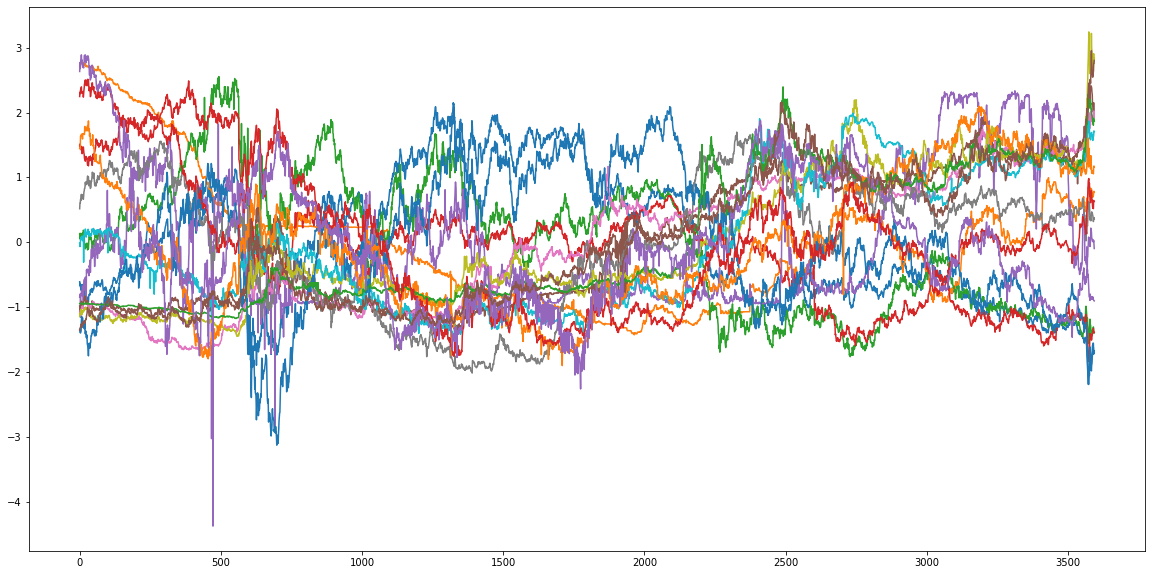

In [6]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
print(normalized_X_train)
plt.plot(normalized_X_train.to_numpy())
plt.show()

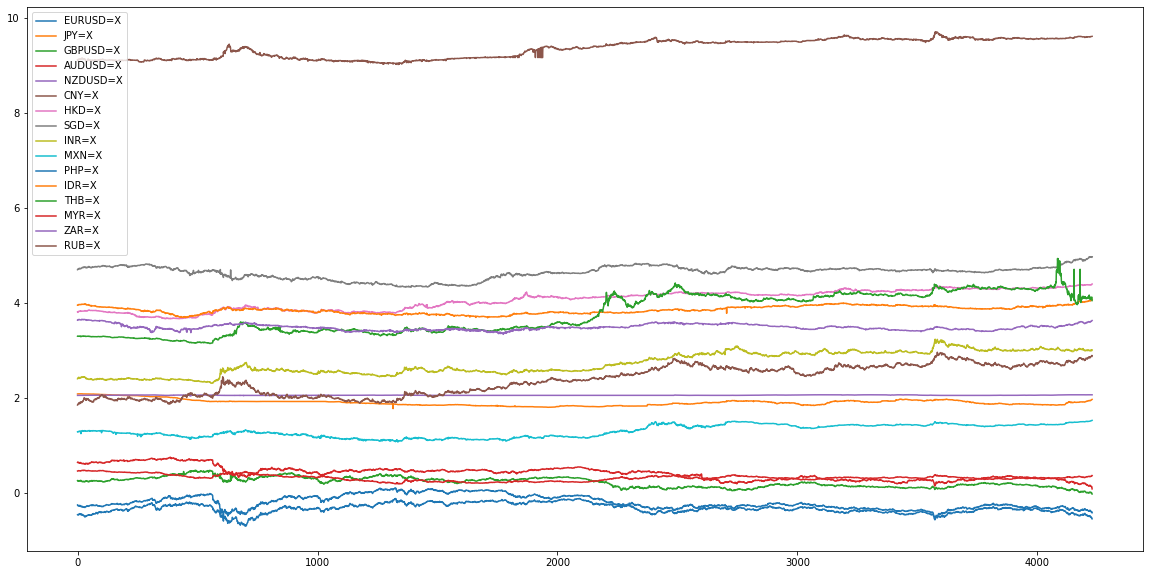

In [7]:
# log distributed data

fx_log = np.log(fx)

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(fx_log.to_numpy(), label=fx_tickers)
plt.legend(loc="upper left")
plt.show()

In [8]:
X_train_log, X_test_log = train_test_split(fx_log, test_size=0.15, shuffle=False)

# normalize train and test data based off of std deviation and mean of the train set
normalized_X_train_log = (X_train_log - X_train_log.mean()) / X_train_log.std()
normalized_X_test_log = (X_test_log - X_train_log.mean()) / X_train_log.std()

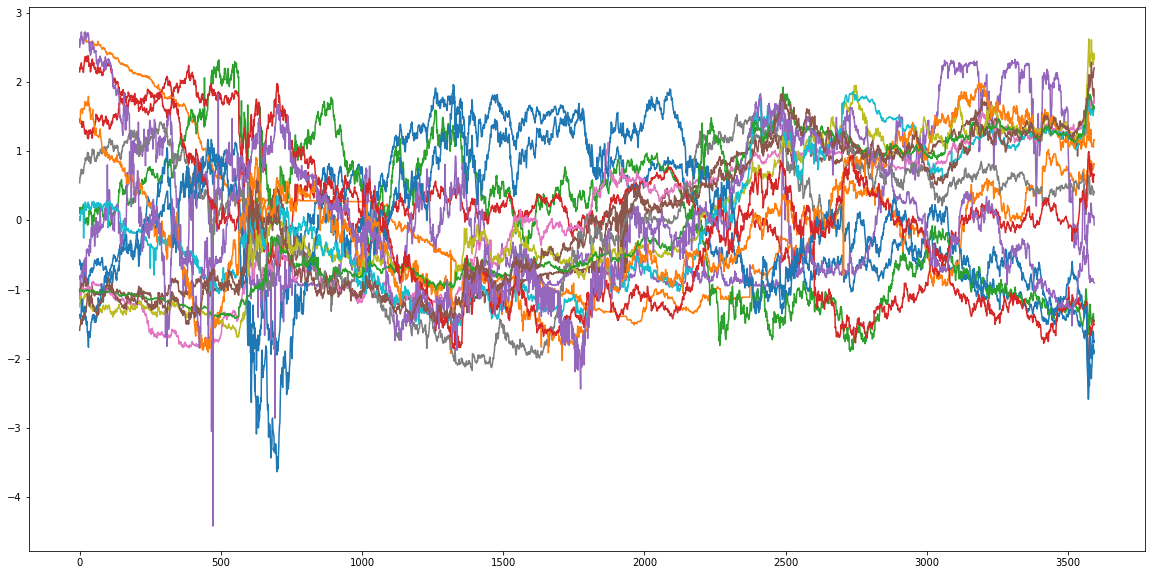

In [9]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(normalized_X_train_log.to_numpy())
plt.show()

In [10]:
normalized_X_train.to_csv('normalized_training_data.csv')
normalized_X_test.to_csv('normalized_test_data.csv')
normalized_X_train_log.to_csv('normalized_training_data_log.csv')
normalized_X_test_log.to_csv('normalized_test_data_log.csv')